# Analyzing Google Play Store

In this notebook we will explore a dataset that we found in Kaggle that contains many interesting informations about Google Play Store an try to find out some meaningful insights.\
\
The tools that we will use are:
- numpy
- pandas
- matplotlib
- seaborn
- wordcloud

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [5]:
project_name = "analyzing-play-store" 

In [6]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [8]:
jovian.commit(project=project_name,files=['googleplaystore.csv','googleplaystore_user_reviews.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kgtheo50/analyzing-play-store" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/kgtheo50/analyzing-play-store


'https://jovian.ml/kgtheo50/analyzing-play-store'

## Data Preparation and Cleaning

In this first step we will import the libraries that we will need and then we will read our csv files 
and try to find out which columns will need some cleaning and transformation.

In [9]:
!pip install wordcloud

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [11]:
ps_df = pd.read_csv('googleplaystore.csv')
rev_df = pd.read_csv('googleplaystore_user_reviews.csv')

Let's take a first look to our dataframes

In [12]:
ps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
rev_df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [14]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [15]:
ps_df.shape

(10841, 13)

In [16]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Almost every column has data type object so we will need to make the below transformations if we want to make our analysis easier.

STEP 1: Check for duplicate records and keep those with highest Reviews (to achieve this we need to transform first column Reviews to numeric)\
STEP 2: Transform columns Installs,Price,Size to numeric\
STEP 3: Transform column Last updated to datetime\

For the most transformations we will use pandas apply function and the anonymous function lambda.

#### STEP 1

In [17]:
print('There are {} records in the dataset but the unique apps are {}'.format(ps_df.shape[0],ps_df.App.nunique()))

There are 10841 records in the dataset but the unique apps are 9660


Let's check if we can convert Reviews column to numeric without getting any error

In [18]:
ps_df[~ps_df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


It seems that record with index 10472 have errors in multimple columns so the best idea is to drop this row

In [19]:
ps_df=ps_df.drop(ps_df.index[10472])

Now we will check if we deleted it correct

In [20]:
ps_df[10470:10474]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


In [21]:
ps_df['Reviews']=pd.to_numeric(ps_df.Reviews)

In [22]:
ps_df = ps_df.sort_values(by='Reviews', ascending=False)

In [23]:
ps_df = ps_df.drop_duplicates(subset='App', keep="first")

In [24]:
ps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


In [25]:
ps_df.shape

(9659, 13)

Everything went as we wanted it, we managed to keep distinct records for each App.

#### STEP 2 - Installs

Let's see what values do we have in Installs column

In [26]:
ps_df.Installs.value_counts()

1,000,000+        1417
100,000+          1113
10,000+           1030
10,000,000+        937
1,000+             887
100+               709
5,000,000+         607
500,000+           504
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        204
100,000,000+       189
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

So we need to remove commas(,) and plus sign(+) before trying to converting to numeric

In [27]:
ps_df.Installs=ps_df.Installs.apply(lambda x: x.replace(',',''))

In [28]:
ps_df.Installs=ps_df.Installs.apply(lambda x: x.strip('+'))

In [29]:
ps_df['Installs']=pd.to_numeric(ps_df.Installs)

In [30]:
ps_df['Installs'].sum()

75322526427

#### STEP 2 - Price

Let's see what values do we have in Price column

In [31]:
ps_df.Price[ps_df.Type=='Paid']

2241    $6.99
4034    $0.99
7417    $6.99
8860    $2.99
9678    $1.99
        ...  
5265    $0.99
6292    $0.99
5269    $0.99
6277    $0.99
8489    $0.99
Name: Price, Length: 754, dtype: object

So in this situation we need to remove dollar signs($) before trying to converting to numeric

In [32]:
ps_df['Price']=ps_df['Price'].apply(lambda x:float(str(x).replace('$','')if '$' in str(x) else str(x)))

In [33]:
ps_df['Price'].sort_values(ascending=False)

4367    400.00
5356    399.99
5359    399.99
5351    399.99
5369    399.99
         ...  
7791      0.00
185       0.00
5765      0.00
4514      0.00
2544      0.00
Name: Price, Length: 9659, dtype: float64

#### STEP 2 - Size

And let's look what we have for the final convertion to numeric

In [34]:
ps_df.Size.sort_values(ascending=False)

2544     Varies with device
52       Varies with device
3158     Varies with device
1130     Varies with device
5532     Varies with device
                ...        
10808                  1.0M
10043                  1.0M
7074                   1.0M
9973                   1.0M
6446                   1.0M
Name: Size, Length: 9659, dtype: object

In [35]:
ps_df.Size.value_counts()

Varies with device    1228
11M                    182
12M                    181
13M                    177
14M                    177
                      ... 
288k                     1
787k                     1
319k                     1
219k                     1
904k                     1
Name: Size, Length: 461, dtype: int64

It seems a little bit harder than the previous because we will need to replace 'Varies with device' with NaN, remove 'M','k' and commas and convert the size to MB to the Apps that are represented to KB. 

In [36]:
ps_df['Size'] = ps_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

In [37]:
ps_df['Size']=ps_df['Size'].apply(lambda x:str(x).replace('M','')if 'M' in str(x) else str(x))
ps_df['Size']=ps_df['Size'].apply(lambda x:str(x).replace(',','')if 'M' in str(x) else str(x))

In [38]:
ps_df['Size']=ps_df['Size'].apply(lambda x:float(str(x).replace('k','')) / 1024 if 'k' in str(x) else str(x))

In [39]:
ps_df['Size']=ps_df['Size'].apply(lambda x:float(x))

#### STEP 3 

In this last step we will use pandas function to_datetime to convert this column to a readable format and understatable for graphs

In [40]:
ps_df['Last Updated']= pd.to_datetime(ps_df['Last Updated'])

In [41]:
ps_df.sort_index().head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up


In [42]:
import jovian

In [43]:
jovian.commit(project=project_name,files=['googleplaystore.csv','googleplaystore_user_reviews.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kgtheo50/analyzing-play-store" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/kgtheo50/analyzing-play-store


'https://jovian.ml/kgtheo50/analyzing-play-store'

## Exploratory Analysis and Visualization

Firstly we will compute some intersting statistics and draw histograms to see the distributions of most important columns in our dataset
and secondly we will explore the associations between different colums by plotting multiple graphs.

Now that we have converted the above columns we can have a more clear representation of what's going on with numeric columns using describe and a heatmap for their correlation.

In [44]:
ps_df.describe()

,Rating,Reviews,Size,Installs,Price
count,8196.000000,9.659000e+03,8431.000000,9.659000e+03,9659.000000
mean,4.173267,2.168041e+05,20.398075,7.798170e+06,1.097231
std,0.536253,1.831430e+06,21.828959,5.376973e+07,16.851618
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.945350e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


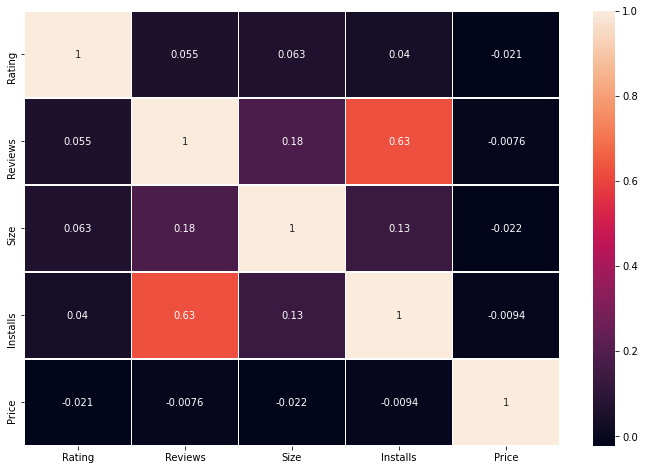

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(ps_df.corr(), annot=True, linewidths=.5);

We can clearly see that we don't have Rating for every App and the variance isn't big, at the 75% percentile of Apps have 4 and above Rating.\
And Installs are seem to be almost uncorrelated except from Reviews. Maybe with more Installs more Reviews will come...\
Let's print below some more statistics.

In [46]:
print("The average downloads per App is {:,}".format(round(ps_df.Installs.mean())))

The average downloads per App is 7,798,170


In [47]:
print("The total reviews that have been submitted in Play Store are {:,}".format(ps_df.Installs.sum()))

The total reviews that have been submitted in Play Store are 75,322,526,427


Now let's create a new dataframe called content_df that will shows which Apps have the most Reviews based on Content Rating.

In [48]:
content_df = pd.pivot_table(ps_df,index=['Content Rating'],values=['Reviews'],aggfunc='sum')
content_df.sort_values(by='Reviews', ascending=False)

,Reviews
Content Rating,
Everyone,1302245300
Teen,503392505
Everyone 10+,201348141
Mature 17+,87042421
Adults only 18+,81348
Unrated,1187


And by far the most reviews are in the Apps with Content Rating for Everyone!

First step before we start plotting graphs will be to set our style to darkgrid,
and plot some histograms to see the distributions of some numeric colums.

In [49]:
sns.set_style("darkgrid")

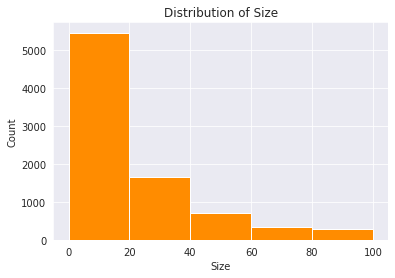

In [50]:
plt.title("Distribution of Size")
plt.xlabel("Size")
plt.ylabel("Count")
plt.hist(ps_df.Size,bins=5,color='darkorange');

Now we will split our dataframe to 2 new ones, one for free apps and one for paid so we can se the distribution of Rating to both of them separately.

In [51]:
free_df = ps_df[ps_df.Type == 'Free']
paid_df = ps_df[ps_df.Type == 'Paid']

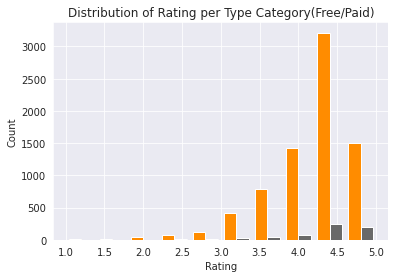

In [52]:
plt.title("Distribution of Rating per Type Category(Free/Paid)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.hist([free_df.Rating,paid_df.Rating],color=['darkorange','dimgray']);

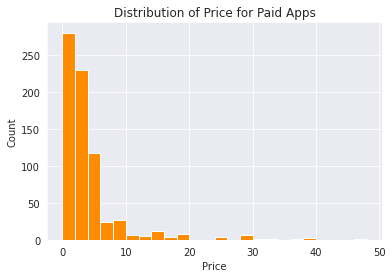

In [53]:
plt.title("Distribution of Price for Paid Apps")
plt.xlabel("Price")
plt.ylabel("Count")
plt.hist(paid_df.Price,bins=np.arange(0, 50, 2),color='darkorange');

Our first plots will be a countplots for Categories & Genres and try to find top 20 in each of them.

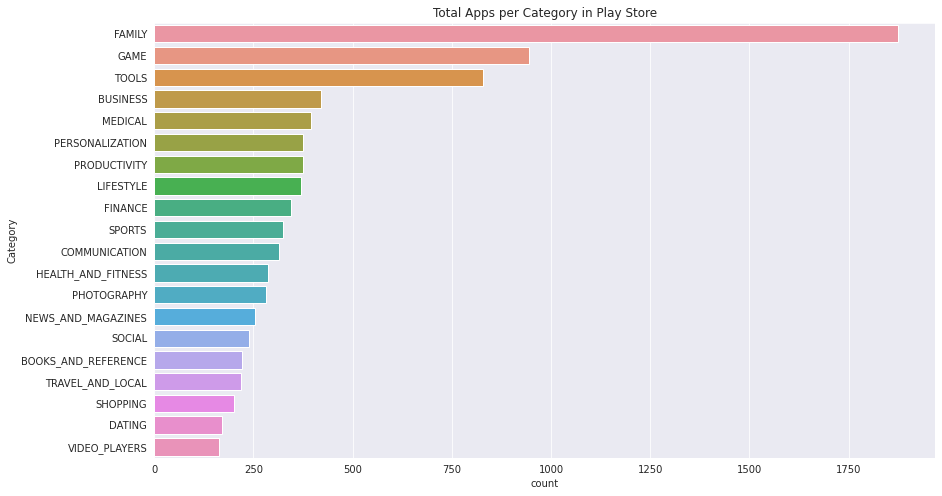

In [54]:
plt.figure(figsize=(14,8))
plt.title("Total Apps per Category in Play Store")
sns.countplot(y='Category',data=ps_df,order=ps_df['Category'].value_counts().iloc[:20].index);

We see that Family Category is conquering Google play store, followed by Games & Tools,\
Now let's see below which Genres have the most Apps.

In [55]:
genres_df = ps_df[(ps_df.Category == 'FAMILY') | (ps_df.Category == 'GAME')]

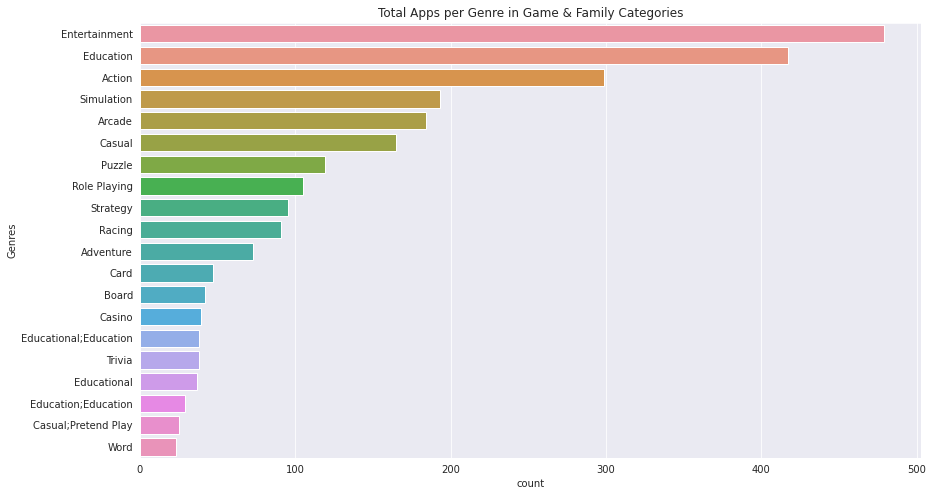

In [56]:
plt.figure(figsize=(14,8))
plt.title("Total Apps per Genre in Game & Family Categories")
sns.countplot(y='Genres',data=genres_df,order=genres_df['Genres'].value_counts().iloc[:20].index);

Clearly people loves Entertainment & Education Apps.

In the next step we will calculate the total Installs for each category

In [57]:
piv_cat = ps_df.groupby('Category')
x = piv_cat['Installs'].agg(np.sum)

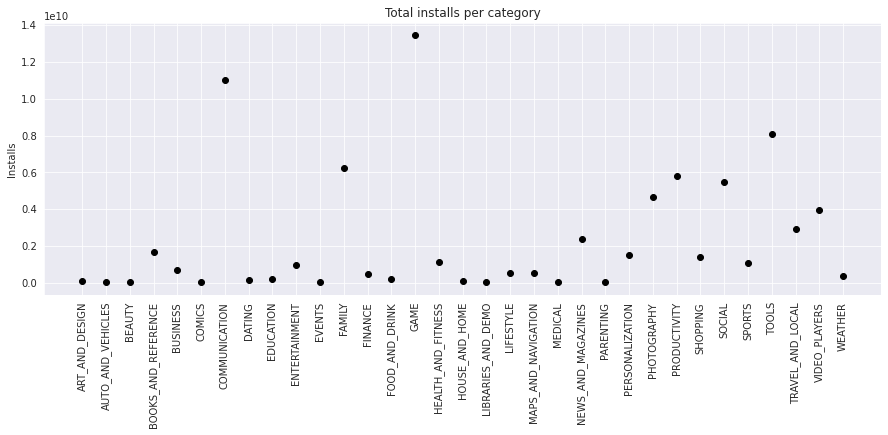

In [58]:
plt.figure(figsize=(15,5))
plt.plot(x,'ro',color='black')
plt.xticks(rotation=90)
plt.ylabel('Installs')
plt.title('Total installs per category')
plt.show()

We found out that by far the Games have the most Installs followed by Communication Apps. If we compare it with the first graph we can see that 3 out of 4 most installed categories are in the top 3 categories with the most apps in the store. So with more apps, maybe more downloads will come...but first let's check it with another graph.

The idea is to create a new dataframe about Installs and Categories that will contain the downloads per App in each Category.\
To achieve this we will apply a lamba function along Installs column.

In [59]:
inapp_df = ps_df.groupby(['Category']).apply(lambda x: round(x['Installs'].sum()/len(x))).to_frame('Installs per App').reset_index().sort_values(by='Installs per App',ascending=False)

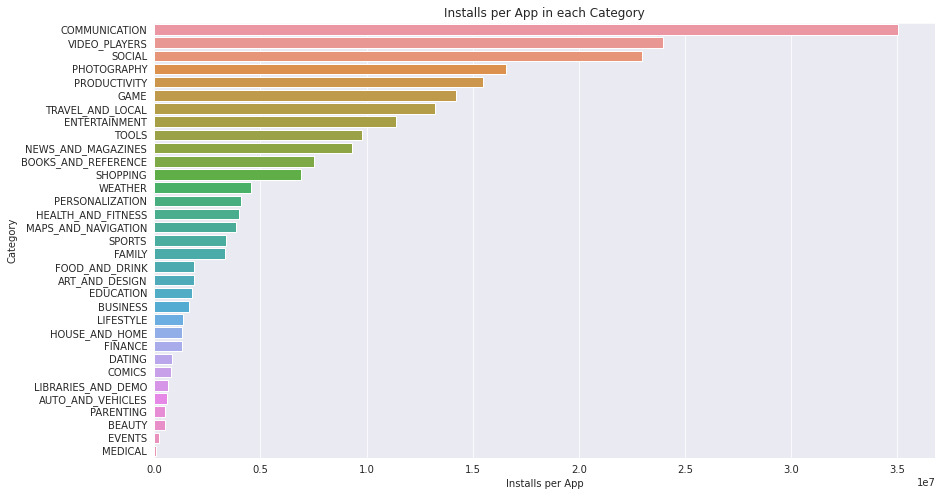

In [60]:
plt.figure(figsize=(14,8))
plt.title("Installs per App in each Category")
sns.barplot(y="Category", x="Installs per App", data=inapp_df);

So we can see by this one that Games & Family aren't even in the top 5, the most successful Category seems to be the Communication.

The next plot will be a boxplot to compare ratings per category

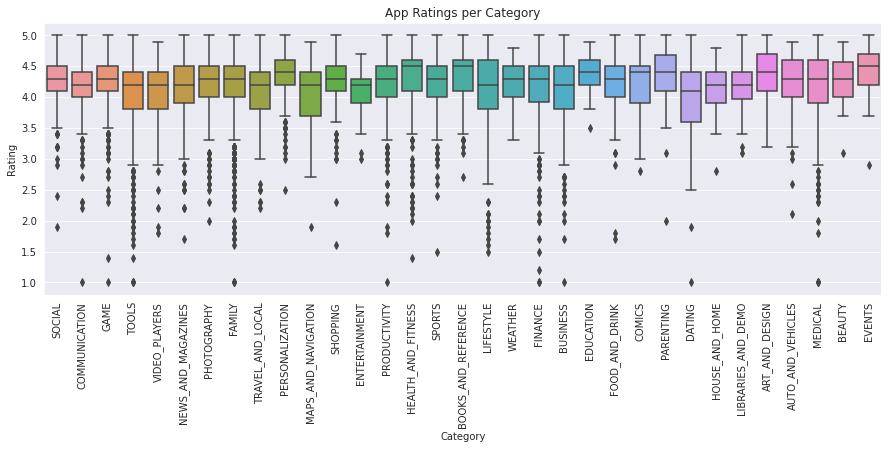

In [61]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Category',y='Rating',data = ps_df)
plt.xticks(rotation=90)
plt.title('App Ratings per Category')
plt.show()

We can see that almost every Category fluctuates in the same levels in Ratings.

Now let's remember what we have found above with describe but only for Rating

In [62]:
ps_df['Rating'].describe()

count    8196.000000
mean        4.173267
std         0.536253
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

The findings in here are:\
All categories have ratings from 1 to 5\
The average rating through categories is almost 4,2\
And the standard deviation is 0.53

Another column that we haven't searched yet is Type, let's see the percentage of each one with a pie chart.

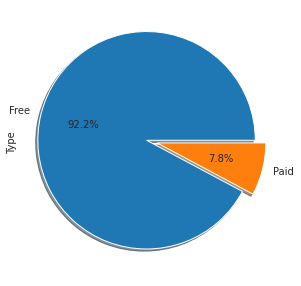

In [63]:
plt.figure(figsize = (5,5))
ps_df['Type'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=(0.1,0))
plt.show()

And the last plot for this section will be the lineplot and we will create an extra column to our dataset to extract the month from each date in the Last Updated column

In [64]:
ps_df['MonthUpd'] = pd.DatetimeIndex(ps_df['Last Updated']).month

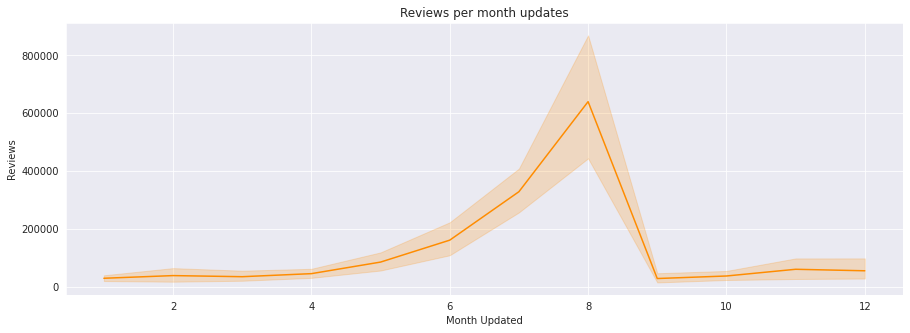

In [65]:
plt.figure(figsize=(15,5))
plt.title('Reviews per month updates')
sns.lineplot(x='MonthUpd',y='Reviews',data=ps_df,color='darkorange');
plt.xlabel("Month Updated", fontsize = 10)
plt.show()

We can conlude that developers must consider releasing apps in the summer and especially in August if they want to have more reviews!

In [66]:
import jovian

In [67]:
jovian.commit(project=project_name,files=['googleplaystore.csv','googleplaystore_user_reviews.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kgtheo50/analyzing-play-store" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/kgtheo50/analyzing-play-store


'https://jovian.ml/kgtheo50/analyzing-play-store'

## Asking and Answering Questions

In this section we will explore further our dataset by making possible questions that someone may have asked us...

#### Q1: Which Apps have the top 10 Reviews per Download with at least 1.000.000 Installs?

In [68]:
ps_df['Reviews_per_download'] = ps_df.Reviews / ps_df.Installs

In [69]:
ps_df[['Category','App','Installs','Reviews','Rating','Reviews_per_download']][ps_df.Installs>1000000].sort_values('Reviews_per_download',ascending=False).head(10)

,Category,App,Installs,Reviews,Rating,Reviews_per_download
1879,GAME,Clash of Clans,100000000,44893888,4.6,0.448939
1888,GAME,Homescapes,10000000,3093932,4.6,0.309393
3958,GAME,MORTAL KOMBAT X,10000000,3039889,4.4,0.303989
10190,FAMILY,Fallout Shelter,10000000,2721923,4.6,0.272192
4870,FAMILY,Angry Birds Epic RPG,10000000,2634605,4.5,0.263460
8248,GAME,Injustice: Gods Among Us,10000000,2440877,4.4,0.244088
2241,FAMILY,Minecraft,10000000,2376564,4.5,0.237656
1878,GAME,Clash Royale,100000000,23136735,4.6,0.231367
1800,GAME,Last Day on Earth: Survival,10000000,2311785,4.5,0.231179
1895,GAME,Fishdom,10000000,2158580,4.6,0.215858


Amazing! People loves Family and Game Categories, and Clash of Clans is on another level with almost half of the people who downloaded have also reviewed it. 

#### Q2: Which are the top 10 Paid Apps that have earned the most money?

In [70]:
ps_df['Income'] = ps_df.Price * ps_df.Installs

In [71]:
ps_df[['Category','App','Installs','Reviews','Rating','Price','Income']].sort_values('Income',ascending=False).head(10)

,Category,App,Installs,Reviews,Rating,Price,Income
2241,FAMILY,Minecraft,10000000,2376564,4.5,6.99,69900000.0
5351,LIFESTYLE,I am rich,100000,3547,3.8,399.99,39999000.0
5356,FINANCE,I Am Rich Premium,50000,1867,4.1,399.99,19999500.0
4034,GAME,Hitman Sniper,10000000,408292,4.6,0.99,9900000.0
7417,GAME,Grand Theft Auto: San Andreas,1000000,348962,4.4,6.99,6990000.0
5578,LIFESTYLE,Sleep as Android Unlock,1000000,23966,4.5,5.99,5990000.0
2883,PHOTOGRAPHY,Facetune - For Free,1000000,49553,4.4,5.99,5990000.0
8804,GAME,DraStic DS Emulator,1000000,87766,4.6,4.99,4990000.0
4367,LIFESTYLE,I'm Rich - Trump Edition,10000,275,3.6,400.00,4000000.0
4362,LIFESTYLE,💎 I'm rich,10000,718,3.8,399.99,3999900.0


People are crazy...they buy apps that cost 400 dollars!! Let's set the max price to 100$...and find the App with most earnings.

In [72]:
ps_df[['Category','App','Installs','Reviews','Rating','Price','Income']][ps_df.Price<=100].sort_values('Income',ascending=False).head(10)

,Category,App,Installs,Reviews,Rating,Price,Income
2241,FAMILY,Minecraft,10000000,2376564,4.5,6.99,69900000.0
4034,GAME,Hitman Sniper,10000000,408292,4.6,0.99,9900000.0
7417,GAME,Grand Theft Auto: San Andreas,1000000,348962,4.4,6.99,6990000.0
2883,PHOTOGRAPHY,Facetune - For Free,1000000,49553,4.4,5.99,5990000.0
5578,LIFESTYLE,Sleep as Android Unlock,1000000,23966,4.5,5.99,5990000.0
8804,GAME,DraStic DS Emulator,1000000,87766,4.6,4.99,4990000.0
4133,WEATHER,Weather Live,500000,76593,4.5,5.99,2995000.0
5631,GAME,Five Nights at Freddy's,1000000,100805,4.6,2.99,2990000.0
9941,TOOLS,Tasker,1000000,43045,4.6,2.99,2990000.0
8860,FAMILY,Bloons TD 5,1000000,190086,4.6,2.99,2990000.0


Minecraft RULES! But also Hitman Sniper shows us that you don't need to create an expensive app to make money...you just need to make it good!

#### Q3: Which are the top 10 Apps that have more negative reviews than positive

In [73]:
sent_df = pd.pivot_table(rev_df,index=['App'],columns=['Sentiment'],values='Sentiment_Polarity',aggfunc='count')

In [74]:
sent_df['Sentiment_Diff'] = sent_df.Positive-sent_df.Negative

In [75]:
sent_df.sort_values(by='Sentiment_Diff').head(10)

Sentiment,Negative,Neutral,Positive,Sentiment_Diff
App,,,,
Candy Crush Soda Saga,96.0,8.0,62.0,-34.0
Be A Legend: Soccer,59.0,6.0,33.0,-26.0
Cooking Fever,79.0,1.0,55.0,-24.0
Candy Crush Saga,126.0,12.0,102.0,-24.0
Angry Birds Classic,147.0,2.0,124.0,-23.0
Candy Crush Jelly Saga,44.0,8.0,21.0,-23.0
Delta Dental,20.0,11.0,9.0,-11.0
HBO GO: Stream with TV Package,17.0,2.0,6.0,-11.0
ABC News - US & World News,29.0,23.0,18.0,-11.0


Ding ding!! We officially found the App with the most haters...its Candy Crush!!!

#### Q4: Which Apps are the most Installed?

In [76]:
ps_df[['Category','App','Installs','Reviews','Rating','Reviews_per_download']][ps_df.Installs>=1000000000].sort_values('Installs',ascending=False)

,Category,App,Installs,Reviews,Rating,Reviews_per_download
2544,SOCIAL,Facebook,1000000000,78158306,4.1,0.078158
381,COMMUNICATION,WhatsApp Messenger,1000000000,69119316,4.4,0.069119
3687,VIDEO_PLAYERS,Google Play Movies & TV,1000000000,906384,3.7,0.000906
152,BOOKS_AND_REFERENCE,Google Play Books,1000000000,1433233,3.9,0.001433
3232,TRAVEL_AND_LOCAL,Google Street View,1000000000,2129707,4.2,0.002130
3565,PRODUCTIVITY,Google Drive,1000000000,2731211,4.4,0.002731
464,COMMUNICATION,Hangouts,1000000000,3419513,4.0,0.003420
451,COMMUNICATION,Gmail,1000000000,4604483,4.3,0.004604
2554,SOCIAL,Google+,1000000000,4831125,4.2,0.004831
5856,FAMILY,Google Play Games,1000000000,7168735,4.3,0.007169


And of course Google Apps and Social Media are in every smart device!

#### Q5: Which android version does the most apps require?

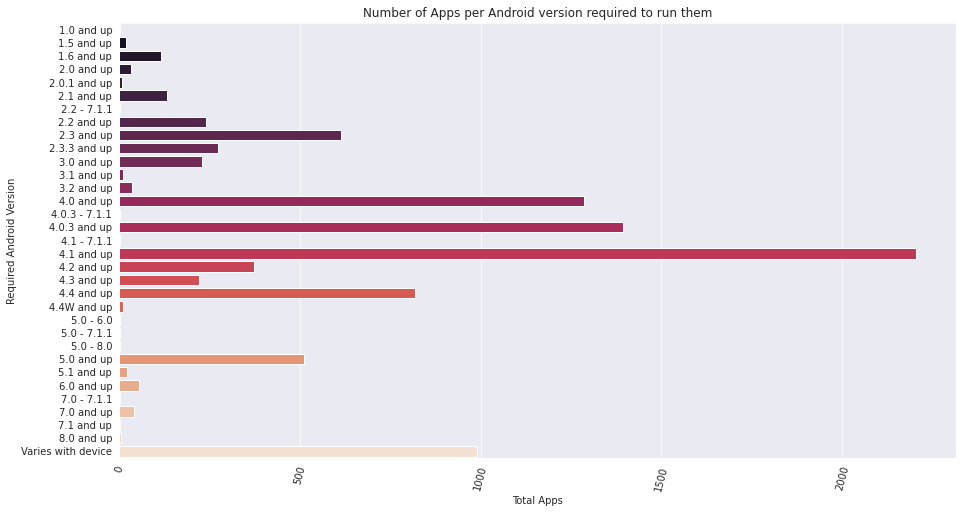

In [77]:
plt.figure(figsize=(15,8))
plt.title('Number of Apps per Android version required to run them')
sns.countplot(y='Android Ver',data = ps_df.sort_values(by = 'Android Ver'),palette='rocket')
plt.xticks(rotation=75)
plt.xlabel('Total Apps')
plt.ylabel('Required Android Version')
plt.show()

We can see clearly that Jelly Bean 4.1 is the minimum required version for the most Apps

#### Q6: What is the most possible rating you will have if your App surpasses 1.000.000 downloads?

In [78]:
print("The most possible rating you will have is {:.1f}".format(ps_df[ps_df.Installs>1000000].Rating.mean()))

The most possible rating you will have is 4.3


#### Q7: Which 5 Categories have the highest average sentiment polarity in their reviews?

In [79]:
merged_df = pd.merge(ps_df, rev_df, how='inner', on=['App'])

In [80]:
merged_df.groupby('Category')['Sentiment_Polarity'].agg(np.mean).nlargest(5)

Category
COMICS               0.440031
EVENTS               0.377933
AUTO_AND_VEHICLES    0.348683
PARENTING            0.318880
EDUCATION            0.296856
Name: Sentiment_Polarity, dtype: float64

In [81]:
merged_df.groupby('Category')['Sentiment_Polarity'].agg(np.mean).nsmallest(5)

Category
GAME                  0.062180
SOCIAL                0.108646
NEWS_AND_MAGAZINES    0.127736
ENTERTAINMENT         0.128679
FAMILY                0.136273
Name: Sentiment_Polarity, dtype: float64

What we just found...Games and Family are in the bottom of sentiment polarity. Maybe a lot of users gave negative opinions but in the other hand as we said before more apps and installs mean more reviews

#### Q8: Which words users usually use in positive reviews?

First we will query rev_df dataset to keep only positives reviews and then add every word we find in every sentence in a list\
And in the last step we will use wordlcloud that we imported in the beggining.

In [82]:
positives = rev_df.query('Sentiment == "Positive"')['Translated_Review']

In [83]:
pos = []
for p in positives:
    pos.append(p.split(' '))
    
pos = sum(pos, [])

while '' in pos:
    pos.remove('')
    

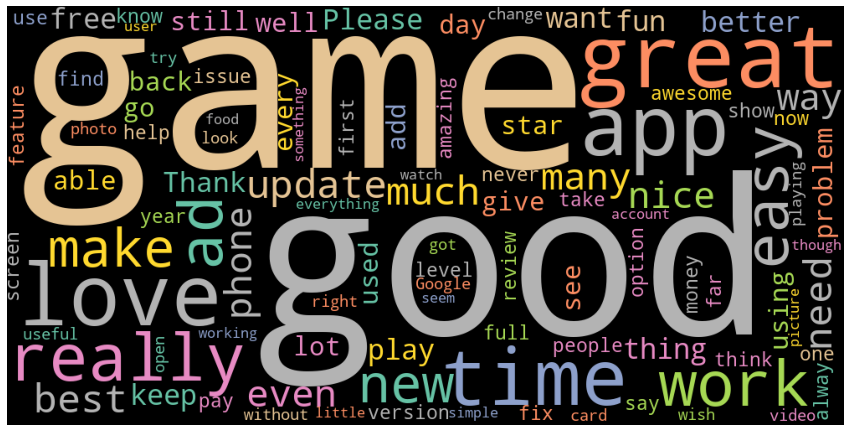

In [84]:
words = WordCloud(width = 1000, height = 500,background_color="black", max_words=100,colormap='Set2', collocations=False)
words.generate(' '.join(pos))
plt.figure(figsize=(15, 15))
plt.axis("off")
plt.imshow(words)
plt.show()

Beautiful words...and again games are everywhere!

In [85]:
import jovian

In [86]:
jovian.commit(project=project_name,files=['googleplaystore.csv','googleplaystore_user_reviews.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kgtheo50/analyzing-play-store" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/kgtheo50/analyzing-play-store


'https://jovian.ml/kgtheo50/analyzing-play-store'

## Inferences and Conclusion

We just got a glance of what's going on in Google Play Store but we had some great results, let's see what we found:

- Family Category have the most available apps and it is in the top 5 with most downloads.
- Most downloaded Category is Games...maybe that's why they called it Play Store!
- The Category with most downloads per App is Communications.
- The Rating is very high with at least 75% of the apps in the range 4 to 5.
- Best period for apps updates is the summer and especially the August having the most reviews.
- The most Apps require at least 4.1 android version.
- Most expensive App costs 400$!!!

In [87]:
import jovian

In [ ]:
jovian.commit(project=project_name,files=['googleplaystore.csv','googleplaystore_user_reviews.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## References and Future Work

For sure this isn't a large dataset to explore but it has many more informations to be explored:

- Explore further the data for every Genre
- Create more calculated columns to find better results
- Find more datasets for Play store in the web and try to merge them
- Use it for machine learning excercise and try to predict Installs,Ratings,Reviews

#### References

- Pandas documentation: https://pandas.pydata.org/
- Matplotlib documentation: https://matplotlib.org/
- Seaborn documentaion: https://seaborn.pydata.org/
- Wordcloud tutorial: https://www.geeksforgeeks.org/generating-word-cloud-python/ 
- And of course many examples I found in https://stackoverflow.com/ that helped me a lot...

Finally this project gave me an amazing opportunity to improve my skills and learn even more about this amazing world called Data analysis!\
It was a fantastic journey and I had a hands-on experience that I will remember as my first steps to so many tools.\
Also this community offered me so much that I couldn't even imagine and I will keep coming back to explore more.\
This is not the end of a great course, this is just the beggining to a new unpredictable path...

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name,files=['googleplaystore.csv','googleplaystore_user_reviews.csv'])